# Analyzing Air Polluion Trends and Their Impact on Public Health

* Course: DSCI 235
* Name: Abdulrahman Alenazi
* CSU ID: 836664858

**Introduction**

One of the most important environmental challenges for humans is the air pollusion.This subject is vital for us since it introduces dangerous risks to both the health and the environment we live in. Keeping these facts in mind, in this project, we want to analyze the relationship between air quality and its impacts on human health using a standard dataset which has detailed air quality metrics, weather conditions and health impact data. In the end of this analysis, we want to find patterns and trends that show us how varying levels of air pollution affect public health outcomes.

Dataset which will be used in this study has 5811 records with imporatant attributes like the Air Quality Index (AQI), concentrations of pollutants (like PM10, PM2.5, NO2, SO2, O3), weather parameters like temperature and humidity and also health impact metrics such as the number of respiratory cases, cardiovascular cases and even hospital admissions. Our target variable which is Health Impact Class, assigns the level of the health impact into five classes ranging from "Very Low" denoted by 4 to "Very High" shown by number 0.

**Analysis**

The tool which will be used to perform our analysis for this dataset will be Pyhton which is a strong programming tool that is widely used among data analysts and statisticians. It has made quite a reputation due to its robustness and effective different libraries which makes data analysation easier and efficient.

We start our analysis by performing Exploratory Data Analysis on our data to discover patterns, trends and relationships in the dataset and also to find missing values, outliers or errors that may affect analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("air_quality_health_impact_data.csv")

In [3]:
print("Dataset Preview of initial rows:")
print(data.head())

Dataset Preview of initial rows:
   RecordID         AQI        PM10       PM2_5         NO2        SO2  \
0         1  187.270059  295.853039   13.038560    6.639263  66.161150   
1         2  475.357153  246.254703    9.984497   16.318326  90.499523   
2         3  365.996971   84.443191   23.111340   96.317811  17.875850   
3         4  299.329242   21.020609   14.273403   81.234403  48.323616   
4         5   78.009320   16.987667  152.111623  121.235461  90.866167   

           O3  Temperature   Humidity  WindSpeed  RespiratoryCases  \
0   54.624280     5.150335  84.424344   6.137755                 7   
1  169.621728     1.543378  46.851415   4.521422                10   
2    9.006794     1.169483  17.806977  11.157384                13   
3   93.161033    21.925276  99.473373  15.302500                 8   
4  241.795138     9.217517  24.906837  14.534733                 9   

   CardiovascularCases  HospitalAdmissions  HealthImpactScore  \
0                    5              

In [4]:
print("\nMissing Values = \n")
print(data.isnull().sum())


Missing Values = 

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64


So, we have no missing values in our dataset. Let's get some basic statitics from the features of our data.

In [6]:
print("\nStatistical Summary of dataset = \n")
print(data.describe())


Statistical Summary of dataset = 

          RecordID          AQI         PM10        PM2_5          NO2  \
count  5811.000000  5811.000000  5811.000000  5811.000000  5811.000000   
mean   2906.000000   248.438476   148.654997   100.223714   102.293445   
std    1677.635538   144.777638    85.698500    58.096612    57.713175   
min       1.000000     0.005817     0.015848     0.031549     0.009625   
25%    1453.500000   122.951293    75.374954    49.435171    53.538538   
50%    2906.000000   249.127841   147.634997   100.506337   102.987736   
75%    4358.500000   373.630668   222.436759   151.340260   151.658516   
max    5811.000000   499.858837   299.901962   199.984965   199.980195   

               SO2           O3  Temperature     Humidity    WindSpeed  \
count  5811.000000  5811.000000  5811.000000  5811.000000  5811.000000   
mean     49.456838   149.312431    14.975500    54.776853     9.989177   
std      28.530329    86.534240    14.483067    26.020786     5.776950   
m

Output shows us 25% of days have AQI <= 123 which is rather good/moderate and 75% <= 373.6 which is unhealthy to hazardous. Hence, we have significant days with hazardous air quality.

Also,  all pollutants like PM10 = 299.9 and O3 = 299.9 are near their scale limits which show extreme pollution events.

Before performing statitical analysis, let's also have a look at frequency distribution of our target.

In [7]:
print("\nDistribution of HealthImpactClass = \n")
print(data['HealthImpactClass'].value_counts())


Distribution of HealthImpactClass:

0.0    4808
1.0     579
2.0     273
3.0      95
4.0      56
Name: HealthImpactClass, dtype: int64


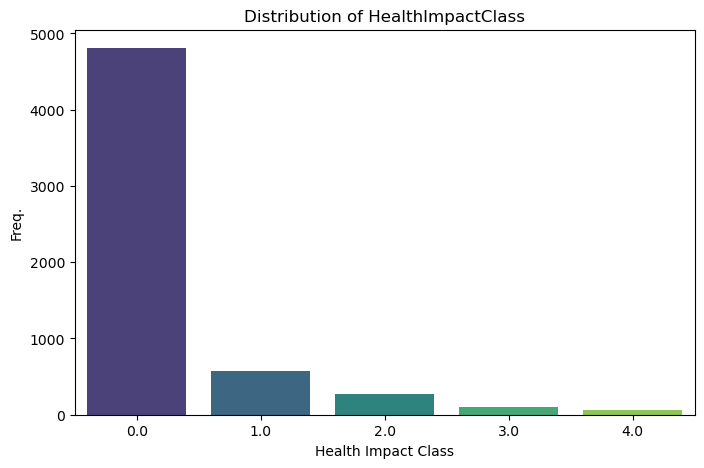

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='HealthImpactClass', data=data, palette='viridis')
plt.title("Distribution of HealthImpactClass")
plt.xlabel("Health Impact Class")
plt.ylabel("Freq.")
plt.show()

Class 0 which is for "Very High" impact, dominates the dataset with 82.7% of records. This may cause for algorithms to ignore minority classes and always predict class 0 for high accuracy. To tackle this problem while we train a model on our data, we will assign class weights manually to adjust class weights in models to penalize misclassification of minority classes and also use SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic samples for classes 1–4.

In order to spot strong positive/negative correlations between variables and to detect redundant variables, we make a heatmap of our features.

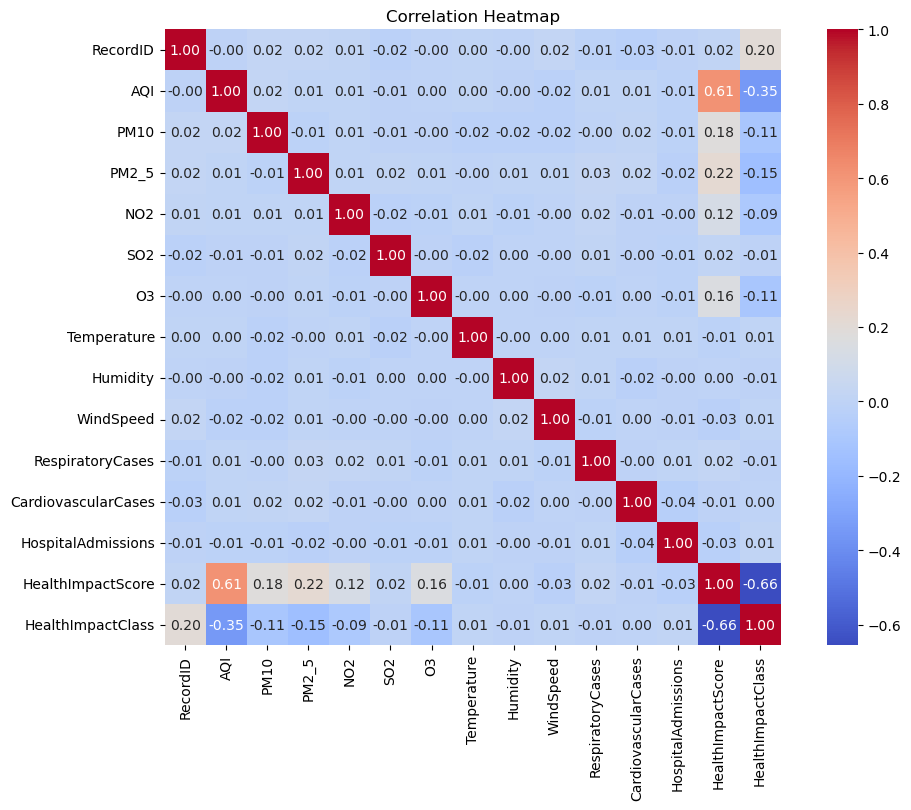

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

The most strong relation, as expected, is between Health Impact Class and Health Impact Score which is natural since class represents the score in this data. Next strong correlation i between AQI and Health Impact Score with correaltion of 0.61. Other significant corraltion is between [AQI and Health Impact Class] , [PM 2_5 and Health Impact Score], [PM 10 and Health Impact Score] and [O3 and Health Impact Score] with -0.35, 0.22, 0.18 and 0.16 respectively.

We can observe this heatmap more carefully and confirm our conclusions above by making it focus on health-relevant features:

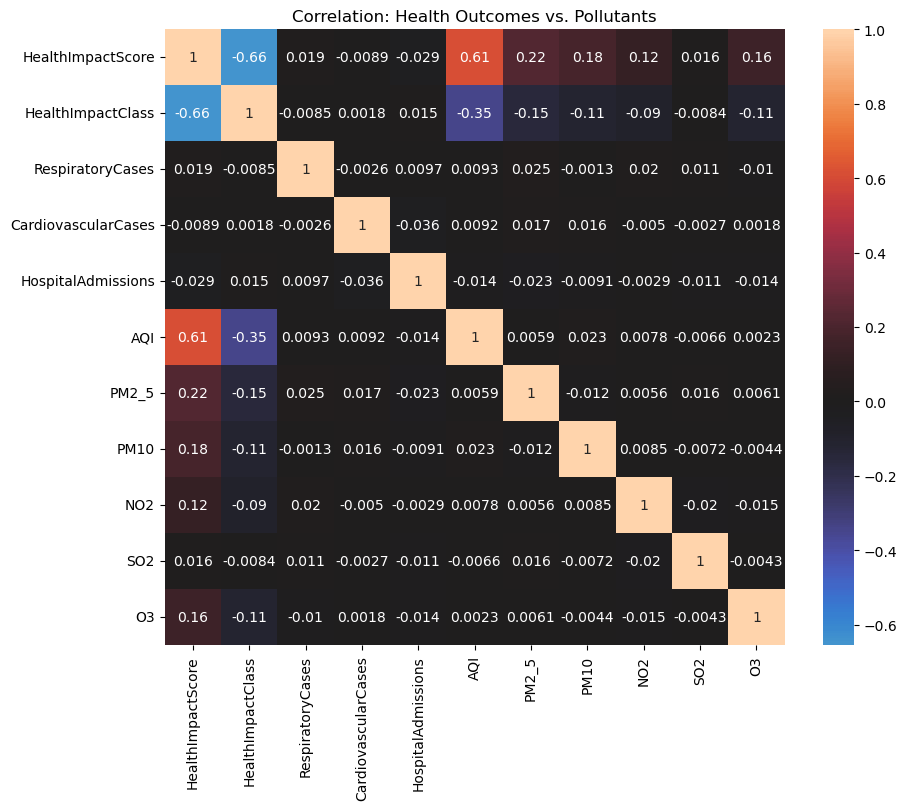

In [26]:
target_features = ['HealthImpactScore', 'HealthImpactClass', 'RespiratoryCases', 
                   'CardiovascularCases', 'HospitalAdmissions']
pollutants = ['AQI', 'PM2_5', 'PM10', 'NO2', 'SO2', 'O3']

plt.figure(figsize=(10, 8))
sns.heatmap(data[target_features + pollutants].corr(), annot=True, cmap='icefire', center=0)
plt.title("Correlation: Health Outcomes vs. Pollutants")
plt.show()

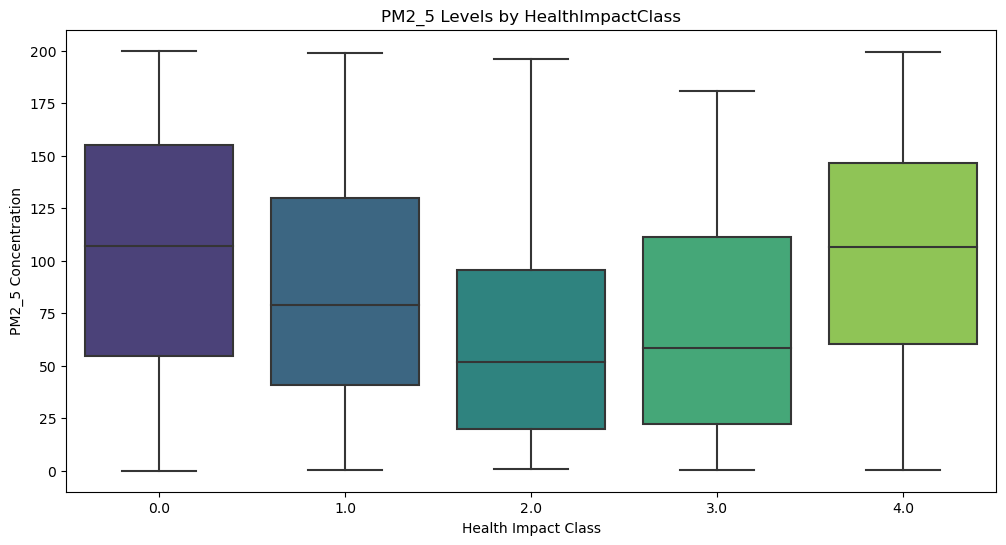

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='HealthImpactClass', y='PM2_5', data=data, palette='viridis')
plt.title("PM2_5 Levels by HealthImpactClass")
plt.xlabel("Health Impact Class")
plt.ylabel("PM2_5 Concentration")
plt.show()

As expected, Class 0 (Very High Health Impact) shows the highest median PM2.5 concentration since PM2_5 penetrate lungs deeply and cause vital health issues. Then, we observe gradual decrease in median PM2_5 as health impact lessens.

To  investigate Class 0 records with low PM2_5:

In [17]:
print(data.groupby("HealthImpactClass")["PM2_5"].median())
low_pm_high_impact = data[(data["HealthImpactClass"] == 0) & (data["PM2_5"] < 50)]
print(low_pm_high_impact[["PM2_5", "NO2", "SO2", "O3"]].describe())

HealthImpactClass
0.0    107.010296
1.0     79.129364
2.0     51.701250
3.0     58.381923
4.0    106.594737
Name: PM2_5, dtype: float64
             PM2_5          NO2          SO2           O3
count  1096.000000  1096.000000  1096.000000  1096.000000
mean     25.533911   106.657558    48.699532   153.981728
std      14.564040    57.730113    28.278815    86.859302
min       0.031549     0.545749     0.298013     0.244385
25%      12.949107    59.163870    24.144694    79.883915
50%      25.803366   107.526029    48.277613   156.787272
75%      38.035339   155.640624    71.719895   228.807506
max      49.936213   199.738851    99.969561   299.220083


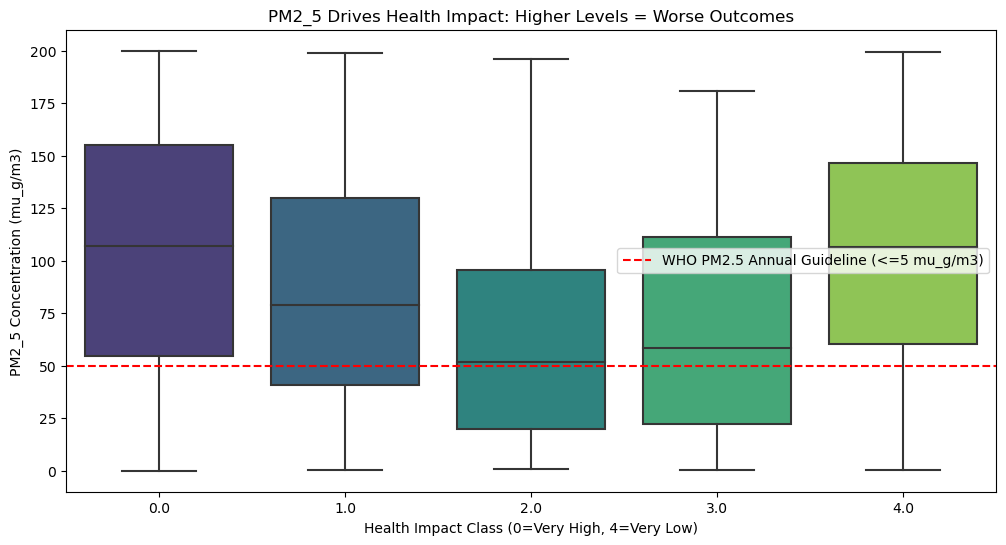

In [16]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='HealthImpactClass', y='PM2_5', data=data, palette='viridis')
plt.axhline(y=50, color='red', linestyle='--', label="WHO PM2.5 Annual Guideline (<=5 mu_g/m3)")
plt.title("PM2_5 Drives Health Impact: Higher Levels = Worse Outcomes")
plt.xlabel("Health Impact Class (0=Very High, 4=Very Low)")
plt.ylabel("PM2_5 Concentration (mu_g/m3)")
plt.legend()
plt.show()

The boxplot confirms that PM2.5 is a very important driver of health impacts, especially for "Very High" risk days of Class 0.

Now, to analyze the relationship between weather parameters and health impact, we plot the following boxplots:

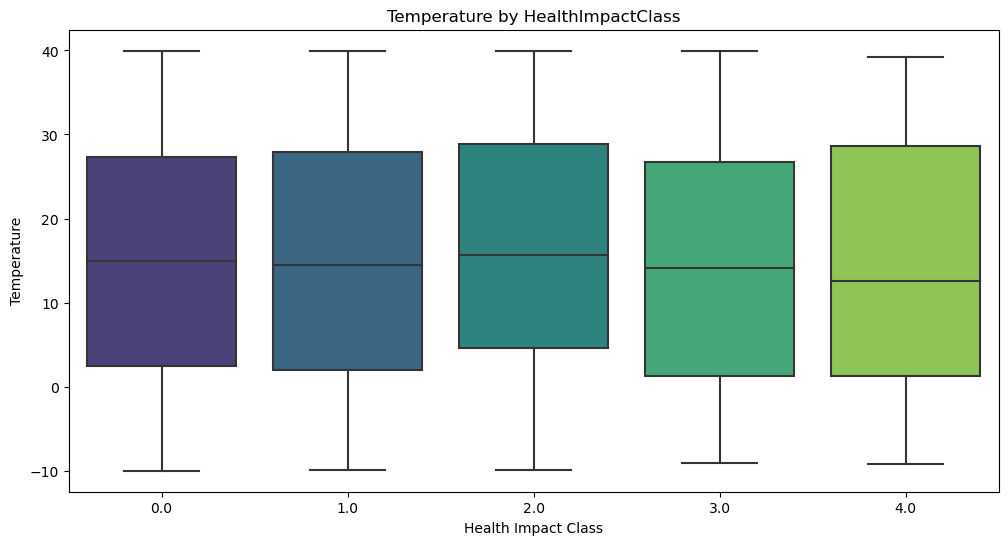

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='HealthImpactClass', y='Temperature', data=data, palette='viridis')
plt.title("Temperature by HealthImpactClass")
plt.xlabel("Health Impact Class")
plt.ylabel("Temperature")
plt.show()


Optically, there are no significant differnces between classes. We will confirm this later statitically.

Now, we draw the scatter plot of AQI vs HealthImpactScore.

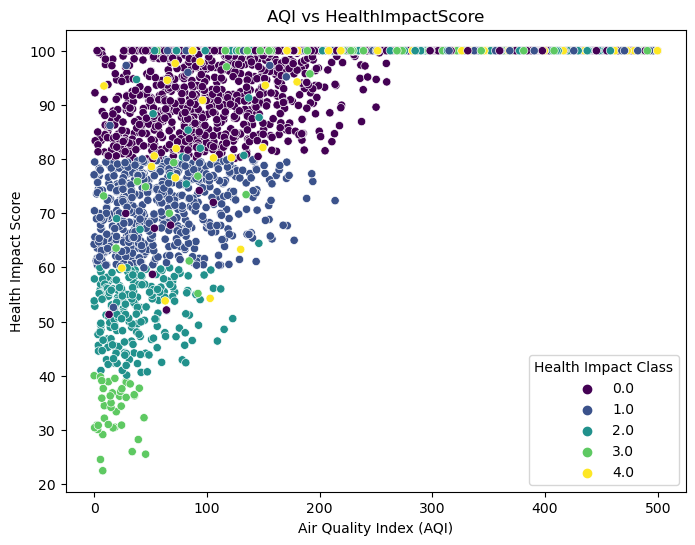

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AQI', y='HealthImpactScore', hue='HealthImpactClass', data=data, palette='viridis')
plt.title("AQI vs HealthImpactScore")
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("Health Impact Score")
plt.legend(title='Health Impact Class')
plt.show()


The higher the air quality index, the greater the chances of observing a lower class (worse) health class. So, it seems that unlike temperature, AQI is an imporatnt feature to affect the health.

Also, it is useful to see the histograms of our features to see if there are any unexpected patterns in their underlying distribution.

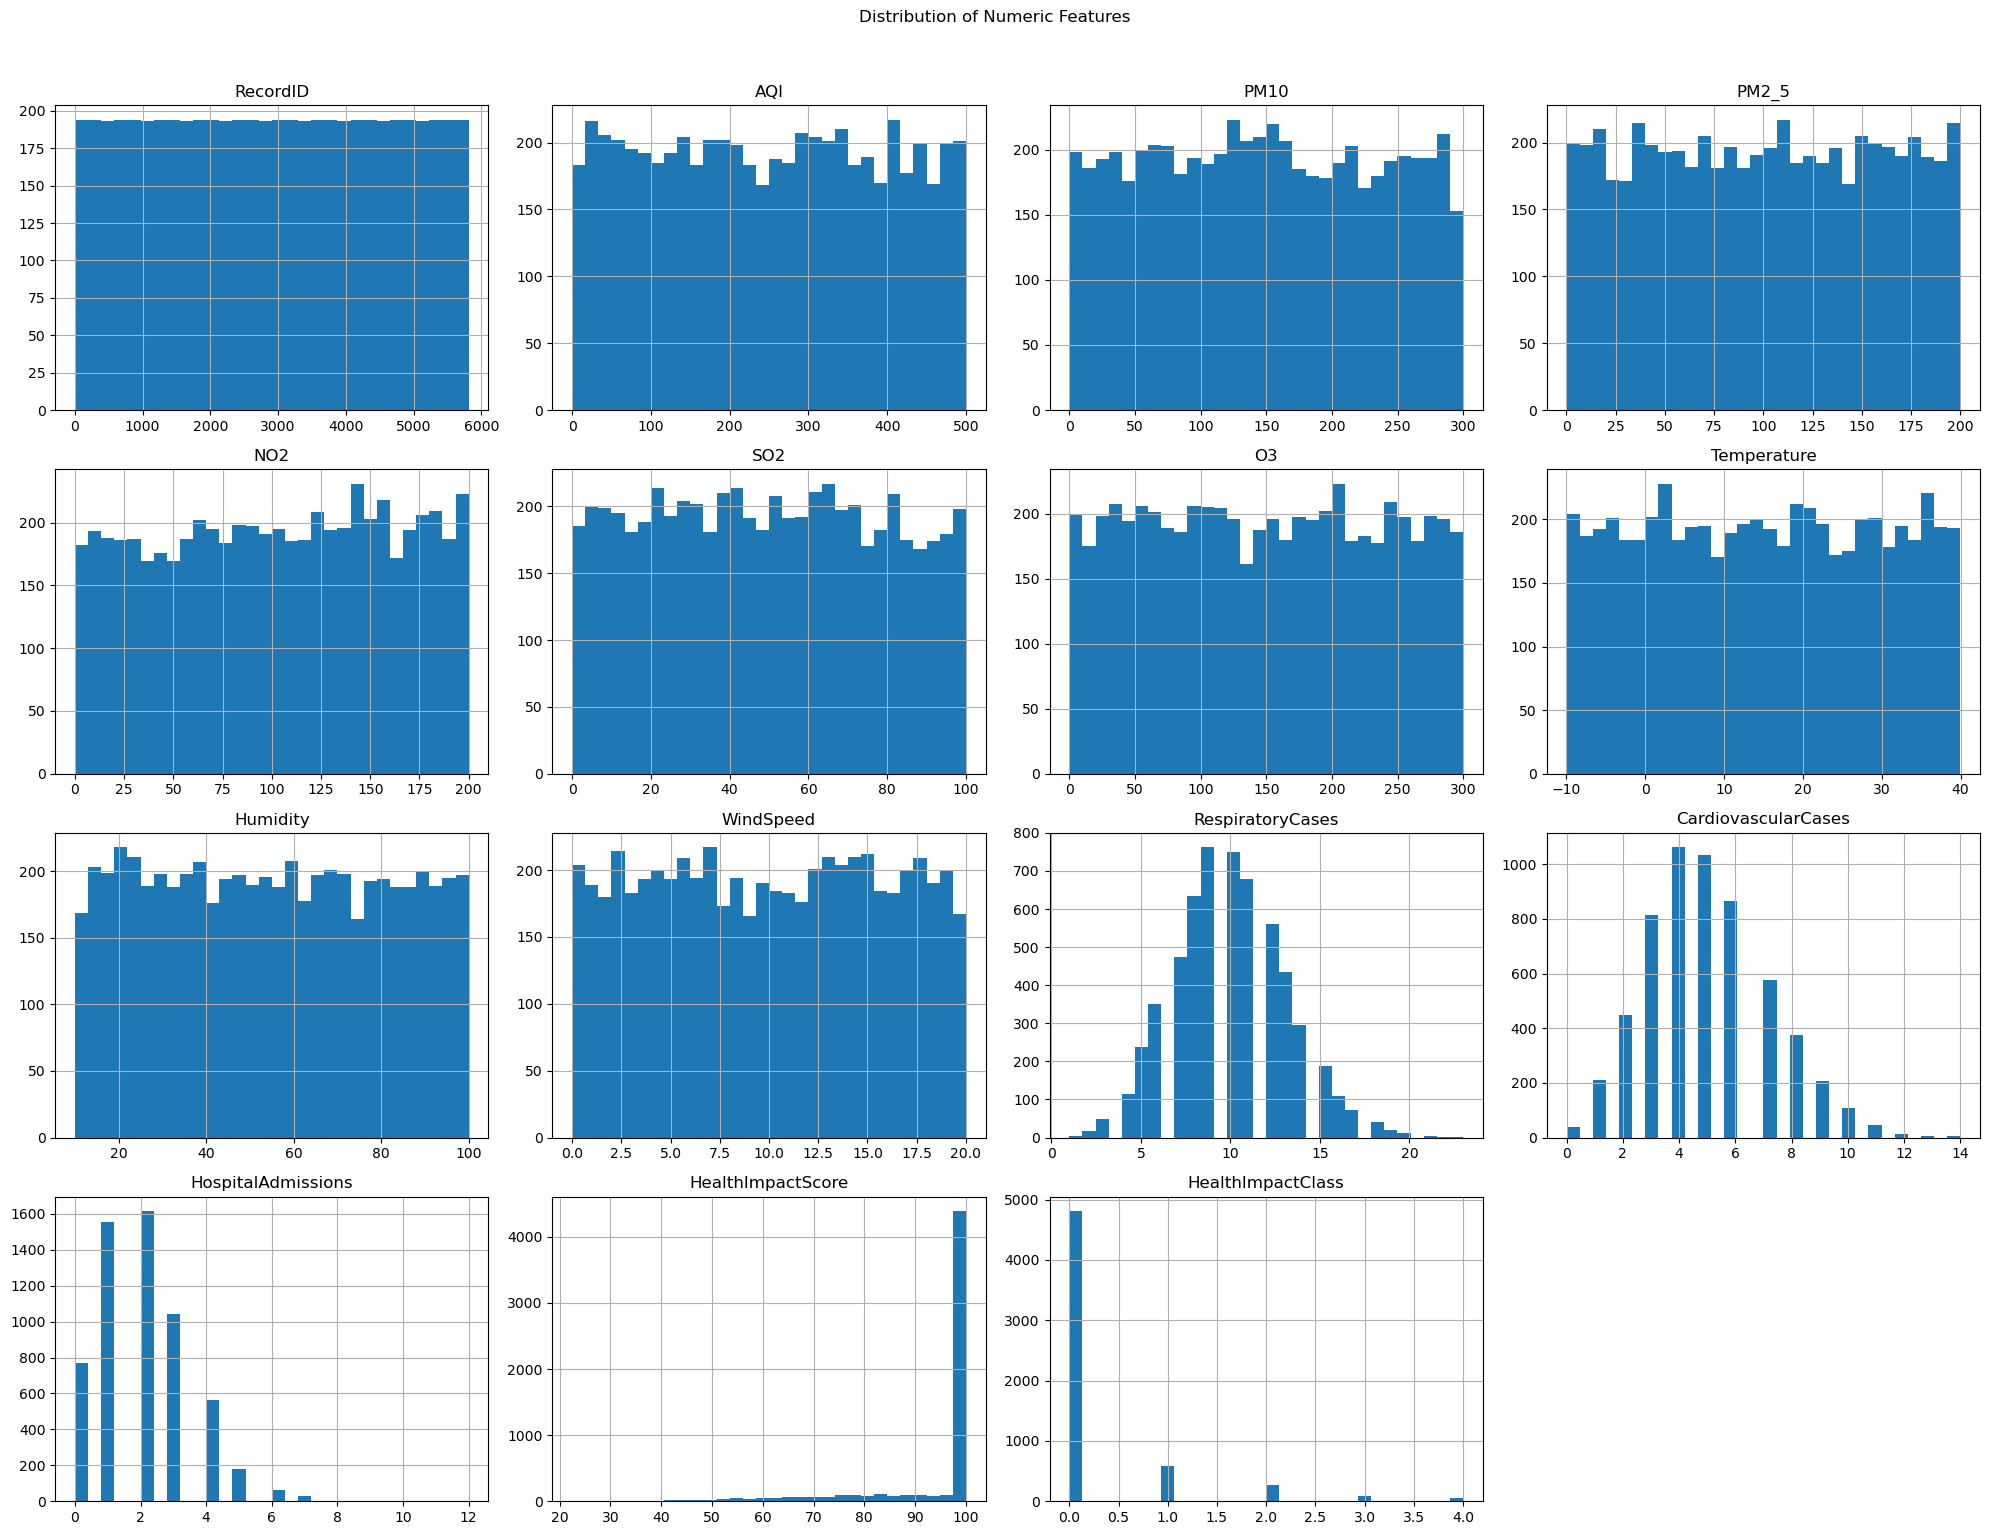

In [21]:
data.hist(figsize=(20, 15), bins=30, layout=(4, 4))
plt.suptitle("Distribution of Numeric Features", y=1.02)
plt.tight_layout()
plt.show()

Mot features have rather uniform distributions except RespiratoryCases which has aproximate normall distribution, CardiovascularCases and HospitalAdmissions which are right-skewed. Also, as seen before, our target feature is heavily skewed as well.

Now, we analyze to see if there are any outliers in our predictors using IQR formula to confirm the results of our boxplots.

In [22]:
pollutants = ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3']

for col in pollutants:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]
    print(f"Outliers in {col}: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)")

Outliers in AQI: 0 (0.00%)
Outliers in PM10: 0 (0.00%)
Outliers in PM2_5: 0 (0.00%)
Outliers in NO2: 0 (0.00%)
Outliers in SO2: 0 (0.00%)
Outliers in O3: 0 (0.00%)


No outliers as expected.

In this step, we want to select key features for pairwise relationships.

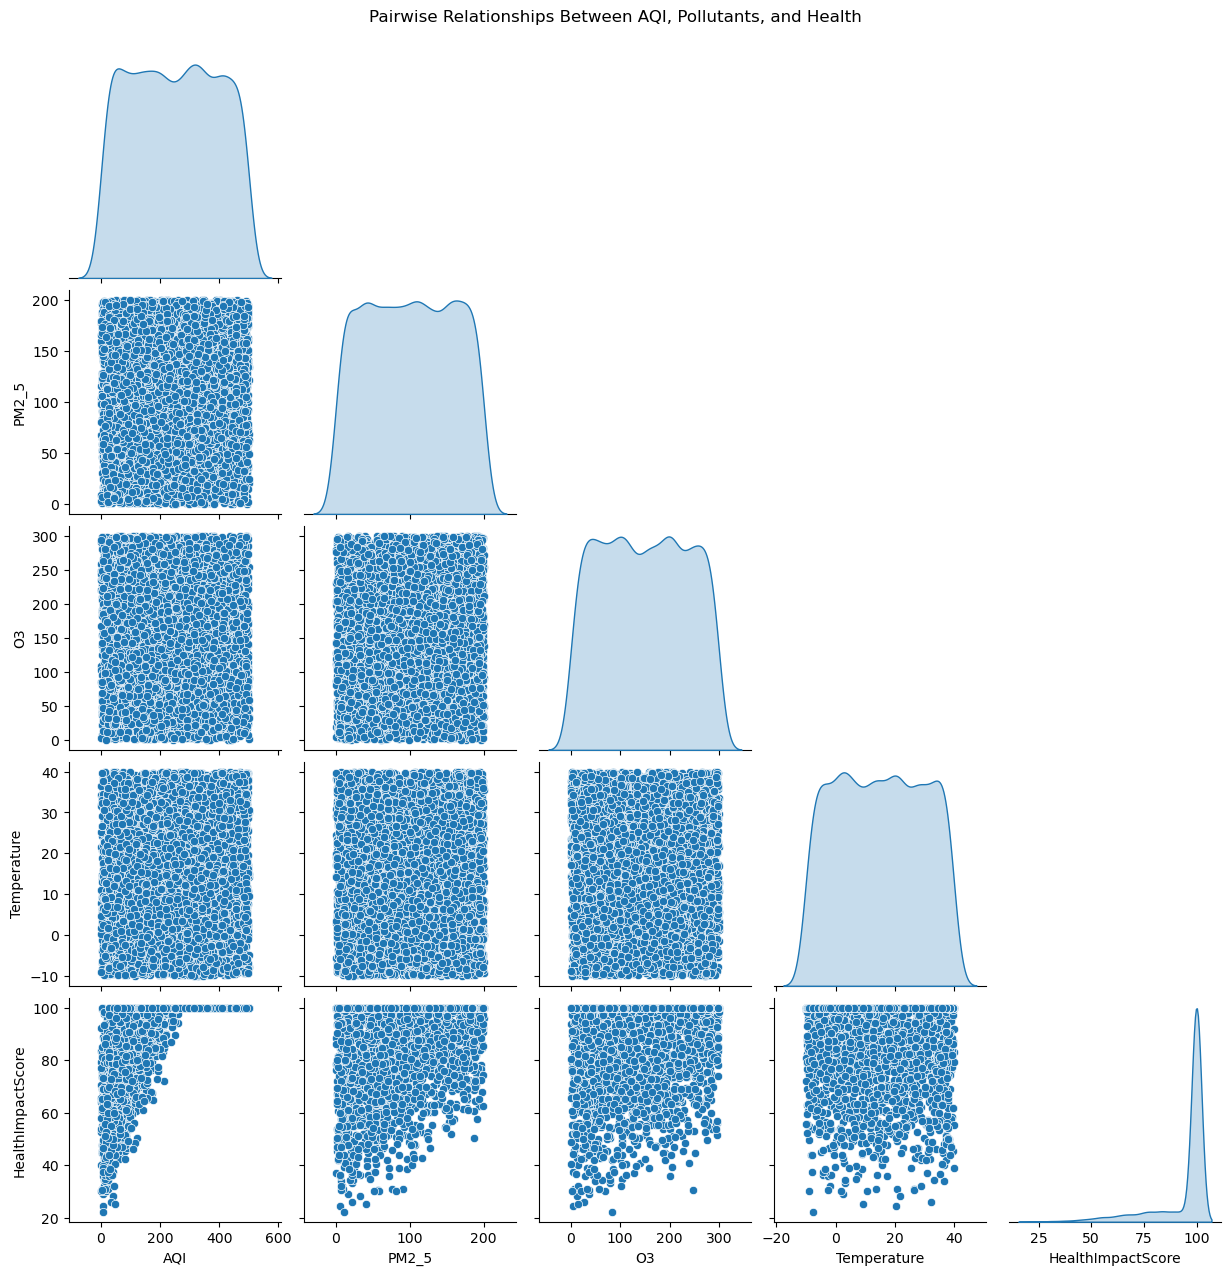

In [23]:
sns.pairplot(data[['AQI', 'PM2_5', 'O3', 'Temperature', 'HealthImpactScore']], 
             diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships Between AQI, Pollutants, and Health", y=1.02)
plt.show()

For instance, these plots reveal non-linear relationships between O3 vs. Temperature.

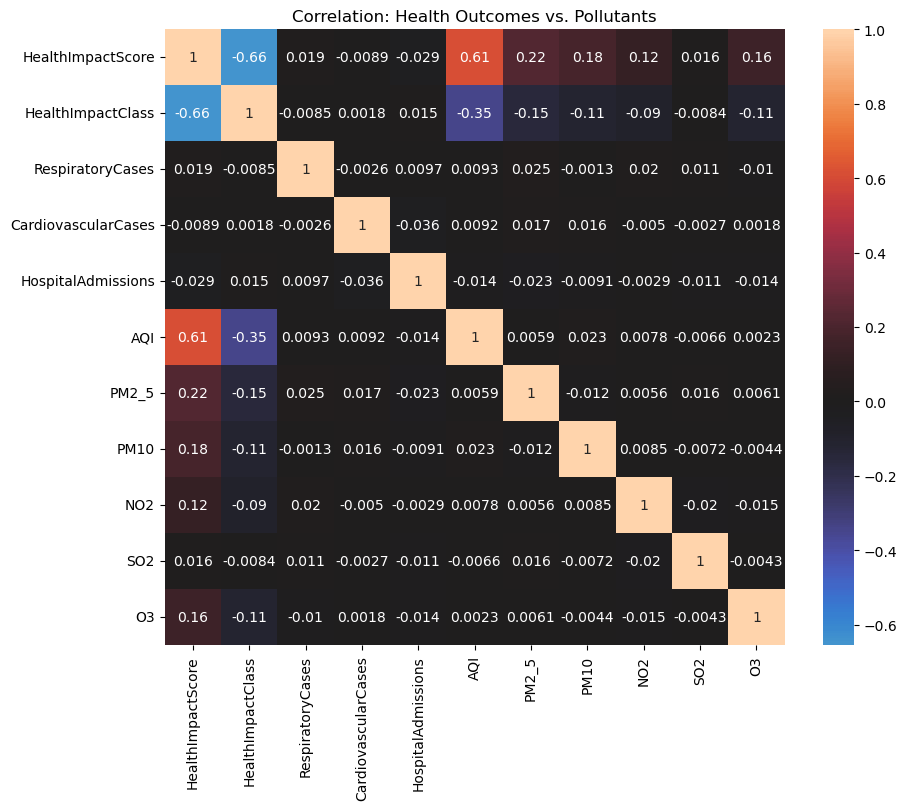

In [25]:
# Focus on health-relevant features
target_features = ['HealthImpactScore', 'HealthImpactClass', 'RespiratoryCases', 
                   'CardiovascularCases', 'HospitalAdmissions']
pollutants = ['AQI', 'PM2_5', 'PM10', 'NO2', 'SO2', 'O3']

plt.figure(figsize=(10, 8))
sns.heatmap(data[target_features + pollutants].corr(), annot=True, cmap='icefire', center=0)
plt.title("Correlation: Health Outcomes vs. Pollutants")
plt.show()

In the next phase of our analysis, we want to perform some hypothesis testings to see if some features are really significant to health scores and are different across health classes or not. We start by testing the most correltaed feature we detected via correlation heatmaps, PM2-5. So:

Null Hypotheis (H0): There is no difference between PM2_5 levels across health classes.
Alternative Hypothesis (Ha): PM2_5 levels differ across health classes.

In [28]:
from scipy.stats import f_oneway

classes = [data[data['HealthImpactClass'] == i]['PM2_5'] for i in range(5)]
f_stat, p_value = f_oneway(*classes)
print(f"ANOVA p-value for PM2.5 across classes: {p_value:.4f}")

ANOVA p-value for PM2.5 across classes: 0.0000


P-VALUE < 5%  which means the result is significant and we can REJECT the null hypothesis and conclude that PM2_5 levels differ across health classes.

Now, to test the effect of AQI on Health Impact:

H0: There is no significant difference in the mean Air Quality Index across different health impact classes.

Ha: There is a significant difference in the mean AQI across different health impact classes.

In [29]:
groups = [data[data['HealthImpactClass'] == i]['AQI'] for i in data['HealthImpactClass'].unique()]
anova_result = f_oneway(*groups)
print("ANOVA Test for AQI across HealthImpactClass:")
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

ANOVA Test for AQI across HealthImpactClass:
F-statistic: 445.41288123347783, p-value: 0.0


P-VALUE < 5%  which means the result is significant and we can REJECT the null hypothesis and conclude that there is a significant difference in the mean AQI across different health impact classes.

Now, to test the eefct of temperature on health cases:

H0: There is no significant difference in the mean temperature across different health impact classes.

Ha: There is a significant difference in the mean temperature across different health impact classes.

In [30]:
groups_temp = [data[data['HealthImpactClass'] == i]['Temperature'] for i in data['HealthImpactClass'].unique()]
anova_temp = f_oneway(*groups_temp)
print("\nANOVA Test for Temperature across HealthImpactClass:")
print(f"F-statistic: {anova_temp.statistic}, p-value: {anova_temp.pvalue}")


ANOVA Test for Temperature across HealthImpactClass:
F-statistic: 0.5115155172179373, p-value: 0.7272884745580621


As we suspected earlier in this analysis from the boxplots, temperature is not a significant factor since its p-value = 0.72 > 5% and hence the result is not significant and there is no significant difference in the mean temperature across different health impact classes.

Finally, in the final step we will train some Machine Learning algorithms on our data and compare them to seee which has classified our records the best and has the best predictive ability.

In [32]:
from scipy.stats import f_oneway, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE  

As mentioned before, to deal with target variable class imbalance, we will use SMOTE technique.

In [34]:
X = data.drop(columns=['RecordID', 'HealthImpactClass'])
y = data['HealthImpactClass']

smote = SMOTE(random_state=777)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

0.0    4808
1.0    4808
3.0    4808
2.0    4808
4.0    4808
Name: HealthImpactClass, dtype: int64


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100, stratify=y_resampled)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("\nLogistic Regression Evaluation:")
print(classification_report(y_test, y_pred_log))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Evaluation:")
print(classification_report(y_test, y_pred_xgb))


Logistic Regression Evaluation:
              precision    recall  f1-score   support

         0.0       0.46      0.60      0.52       962
         1.0       0.61      0.73      0.67       961
         2.0       0.57      0.58      0.58       961
         3.0       0.30      0.15      0.20       962
         4.0       0.46      0.44      0.45       962

    accuracy                           0.50      4808
   macro avg       0.48      0.50      0.48      4808
weighted avg       0.48      0.50      0.48      4808


Random Forest Evaluation:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       962
         1.0       0.99      0.97      0.98       961
         2.0       0.99      0.96      0.98       961
         3.0       1.00      0.99      0.99       962
         4.0       0.99      1.00      0.99       962

    accuracy                           0.98      4808
   macro avg       0.98      0.98      0.98      4808
weighted avg     

In [36]:
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("\nModel Accuracy Comparison:")
print(f"Logistic Regression: {accuracy_log}")
print(f"Random Forest: {accuracy_rf}")
print(f"XGBoost: {accuracy_xgb}")


Model Accuracy Comparison:
Logistic Regression: 0.5020798668885191
Random Forest: 0.9814891846921797
XGBoost: 0.9775374376039934


From these results, we can conclude that has the wrst performance and it struggles with imbalanced classes since F1 for Class 3 = 20%. It also has low recall for minority classes (like Class 3 recall = 15%). This is due to the fact that linear models often fail to capture complex relationships in imbalanced data.

On the other hand, Random Forest and XGBoost both show near perfect performances with both achieving 98% accuracy/F1 but XGBoost slightly better on Class 0. They both handle class imbalance effectively since they show high recall for all classes.
This is because Tree-based models naturally handle non-linearities and interactions.Also, XGBoost’s regularization prevent minor overfitting seen in Random Forest.

Now, we plot the feature importance for Random Forest.

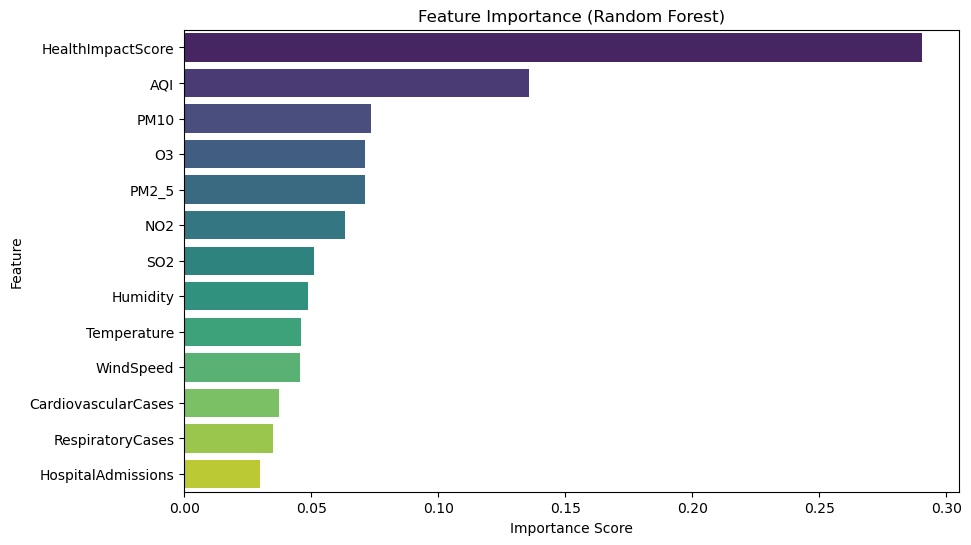

In [37]:
importances = rf_model.feature_importances_
feature_names = data.drop(columns=['RecordID', 'HealthImpactClass']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


We observe that, as expcted from previous results, Air Quality Index and pollutant concentrations (PM10, PM2.5, NO2, SO2, O3) are among the most influential features in Random Forest which makes total sense because they directly contribute to the air quality and health impact score.

feature importance for XGboost

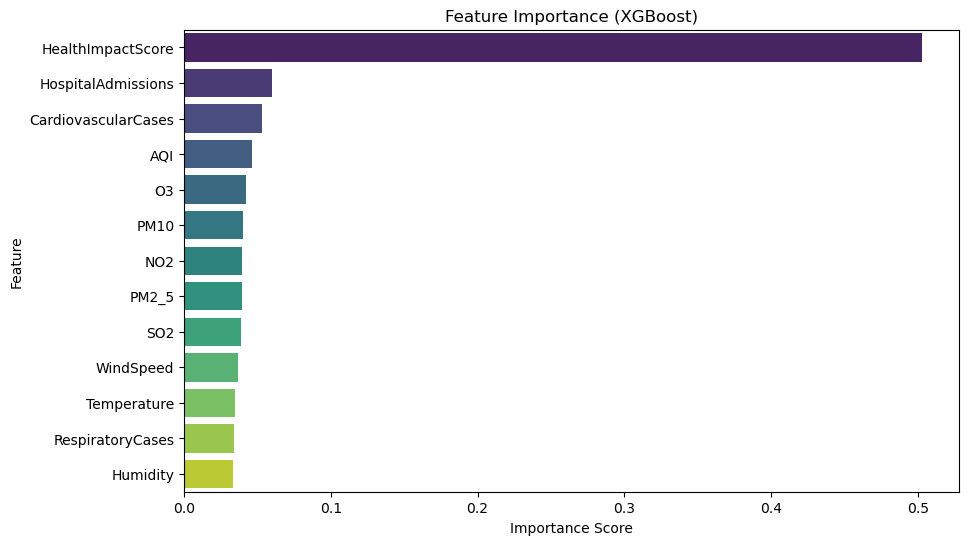

In [38]:
xgb_importances = xgb_model.feature_importances_
xgb_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df, palette='viridis')
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

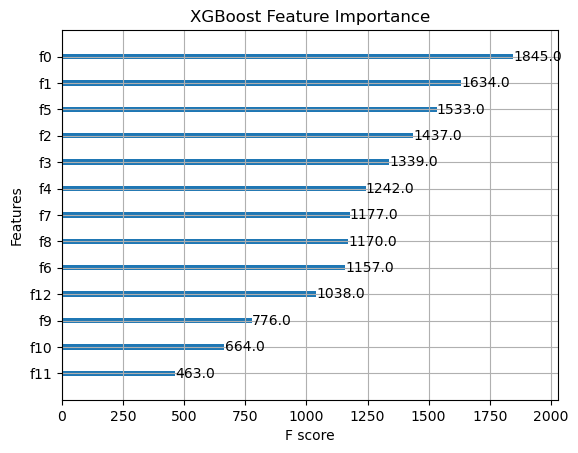

In [39]:
from xgboost import plot_importance
plot_importance(xgb_model)
plt.title("XGBoost Feature Importance")
plt.show()

For XGboost on the other hand, health metrics are more important featues to enable categorizing since they are closely linked to the target variable and are expected to have to high importance.

In the final step, we plot the normalized confusion matrix to answer critical questions about model performance that accuracy or F1 scores alone cannot.

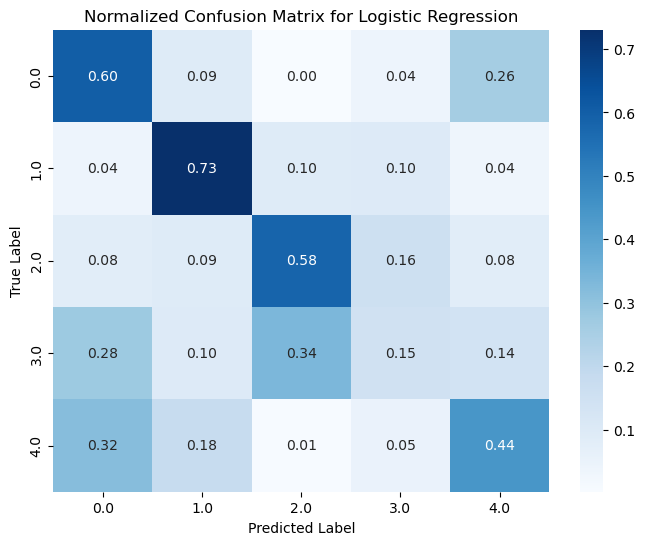

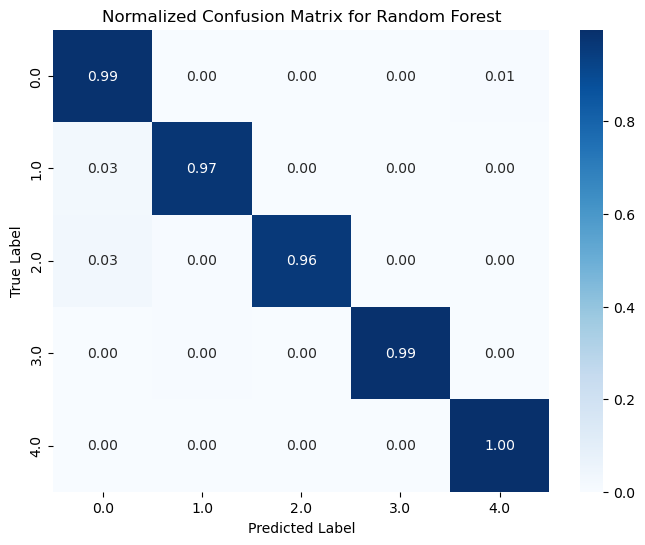

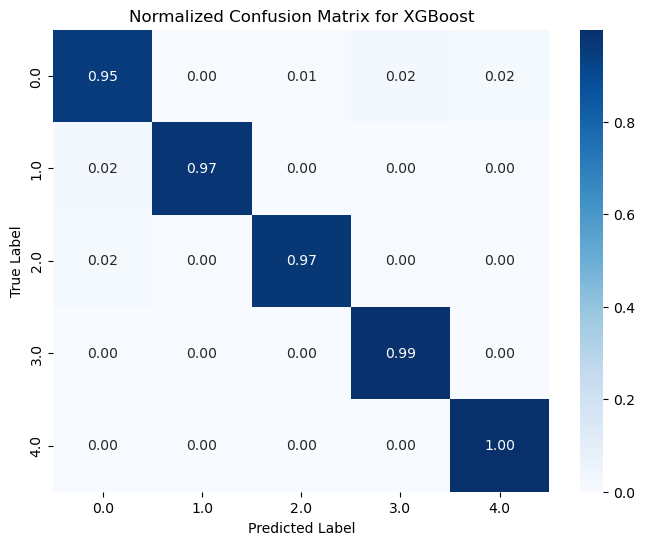

In [41]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_normalized_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(f'Normalized Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_normalized_confusion_matrix(y_test, y_pred_log, "Logistic Regression")

plot_normalized_confusion_matrix(y_test, y_pred_rf, "Random Forest")

plot_normalized_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

We observe that LR has high values on the diagonal for Class 0 for Very High Impact but poor recall for minority classes, especially Class 3.

RF and XGboost have near perfect diagonal for all classes and just minimal off-diagonal values that shows confusion between adjacent classes.

This is expected as ensemble methods handle imbalance and non-linear relationships effectively.



**Conclusion**

To sum it all up, in our analysis, we tried to analyze the relationship between air pollution and public health outcomes using a dataset with air quality metrics like AQI, PM2.5, O3, ... and weather conditions and health impact records. We used and implemented exploratory data analysis, statistical modeling and performance evaluation and derived meaningful relations and found patterns amongst attributes and target variable of ineterst.

We found that AQI and PM2_5 has the strongest correlations with health impacts with F1 scores > 0.95 in ensemble models and higher pollutant levels like PM2.5 > 50 mug/m3 were linked to "Very High" health impacts.

In case of our Machine Learning algorithms to predict the unssen data in the future and classify them, we observed that Logistic Regression couldn't deal with imbalanced data, especially for minority classes while Tree-based models lieke Random Forest and XGBoost achieved near-perfect performance by capturing non-linear relationships. Finally, by confusion matrix analysis, we observed XGBoost and Random Forest correctly classified over 95% of cases across all health risk levels.